In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
dataPath = '../preprocess_train_dataset/encodedData_01.csv'

df_spaceship = pd.read_csv(dataPath)

df_spaceship.shape

(8693, 36)

In [5]:
df_spaceship

,PassengerId,HomePlanet,Earth,Europa,Mars,CryoSleep,Cabin_deck,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,...,FoodCourt,ShoppingMall,Spa,VRDeck,Total_spending,First_Name,Last_Name,First_Name_le,Last_Name_le,Transported
0,0001_01,Europa,False,True,False,False,B,False,True,False,...,0.0,0.0,0.0,0.0,0.0,Maham,Ofracculy,1614,1431,False
1,0002_01,Earth,True,False,False,False,F,False,False,False,...,9.0,25.0,549.0,44.0,736.0,Juanna,Vines,1407,2109,True
2,0003_01,Europa,False,True,False,False,A,True,False,False,...,3576.0,0.0,6715.0,49.0,10383.0,Altark,Susent,156,1990,False
3,0003_02,Europa,False,True,False,False,A,True,False,False,...,1283.0,371.0,3329.0,193.0,5176.0,Solam,Susent,2276,1990,False
4,0004_01,Earth,True,False,False,False,F,False,False,False,...,70.0,151.0,565.0,2.0,1091.0,Willy,Santantines,2642,1778,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,True,False,False,A,True,False,False,...,6819.0,0.0,1643.0,74.0,8536.0,Gravior,Noxnuther,1135,1416,False
8689,9278_01,Earth,True,False,False,True,G,False,False,False,...,0.0,0.0,0.0,0.0,0.0,Kurta,Mondalley,1492,1341,False
8690,9279_01,Earth,True,False,False,False,G,False,False,False,...,0.0,1872.0,1.0,0.0,1873.0,Fayey,Connon,955,470,True
8691,9280_01,Europa,False,True,False,False,E,False,False,False,...,1049.0,0.0,353.0,3235.0,4637.0,Celeon,Hontichre,526,996,False


In [6]:
df_spaceship.dtypes

PassengerId        object
HomePlanet         object
Earth                bool
Europa               bool
Mars                 bool
CryoSleep            bool
Cabin_deck         object
Cabin_deck_A         bool
Cabin_deck_B         bool
Cabin_deck_C         bool
Cabin_deck_D         bool
Cabin_deck_E         bool
Cabin_deck_F         bool
Cabin_deck_G         bool
Cabin_deck_T         bool
Cabin_num           int64
Cabin_side         object
Cabin_side_P         bool
Cabin_side_S         bool
Destination        object
55 Cancri e          bool
PSO J318.5-22        bool
TRAPPIST-1e          bool
Age               float64
VIP                  bool
RoomService       float64
FoodCourt         float64
ShoppingMall      float64
Spa               float64
VRDeck            float64
Total_spending    float64
First_Name         object
Last_Name          object
First_Name_le       int64
Last_Name_le        int64
Transported          bool
dtype: object

In [7]:
train_x, train_y = df_spaceship.drop(columns=['Transported']), df_spaceship['Transported']

In [8]:
# drop categorical data, remain the one hot encoded ones 

train_x.drop(['PassengerId', 'HomePlanet', 'Cabin_deck', 'Cabin_side', 'Destination', 'First_Name', 'First_Name_le', 'Last_Name'], axis=1, inplace=True)

In [9]:
train_x

,Earth,Europa,Mars,CryoSleep,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,...,TRAPPIST-1e,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total_spending,Last_Name_le
0,False,True,False,False,False,True,False,False,False,False,...,True,39.0,False,0.0,0.0,0.0,0.0,0.0,0.0,1431
1,True,False,False,False,False,False,False,False,False,True,...,True,24.0,False,109.0,9.0,25.0,549.0,44.0,736.0,2109
2,False,True,False,False,True,False,False,False,False,False,...,True,58.0,True,43.0,3576.0,0.0,6715.0,49.0,10383.0,1990
3,False,True,False,False,True,False,False,False,False,False,...,True,33.0,False,0.0,1283.0,371.0,3329.0,193.0,5176.0,1990
4,True,False,False,False,False,False,False,False,False,True,...,True,16.0,False,303.0,70.0,151.0,565.0,2.0,1091.0,1778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,True,False,False,True,False,False,False,False,False,...,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,8536.0,1416
8689,True,False,False,True,False,False,False,False,False,False,...,False,18.0,False,0.0,0.0,0.0,0.0,0.0,0.0,1341
8690,True,False,False,False,False,False,False,False,False,False,...,True,26.0,False,0.0,0.0,1872.0,1.0,0.0,1873.0,470
8691,False,True,False,False,False,False,False,False,True,False,...,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,4637.0,996


In [10]:
train_y

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

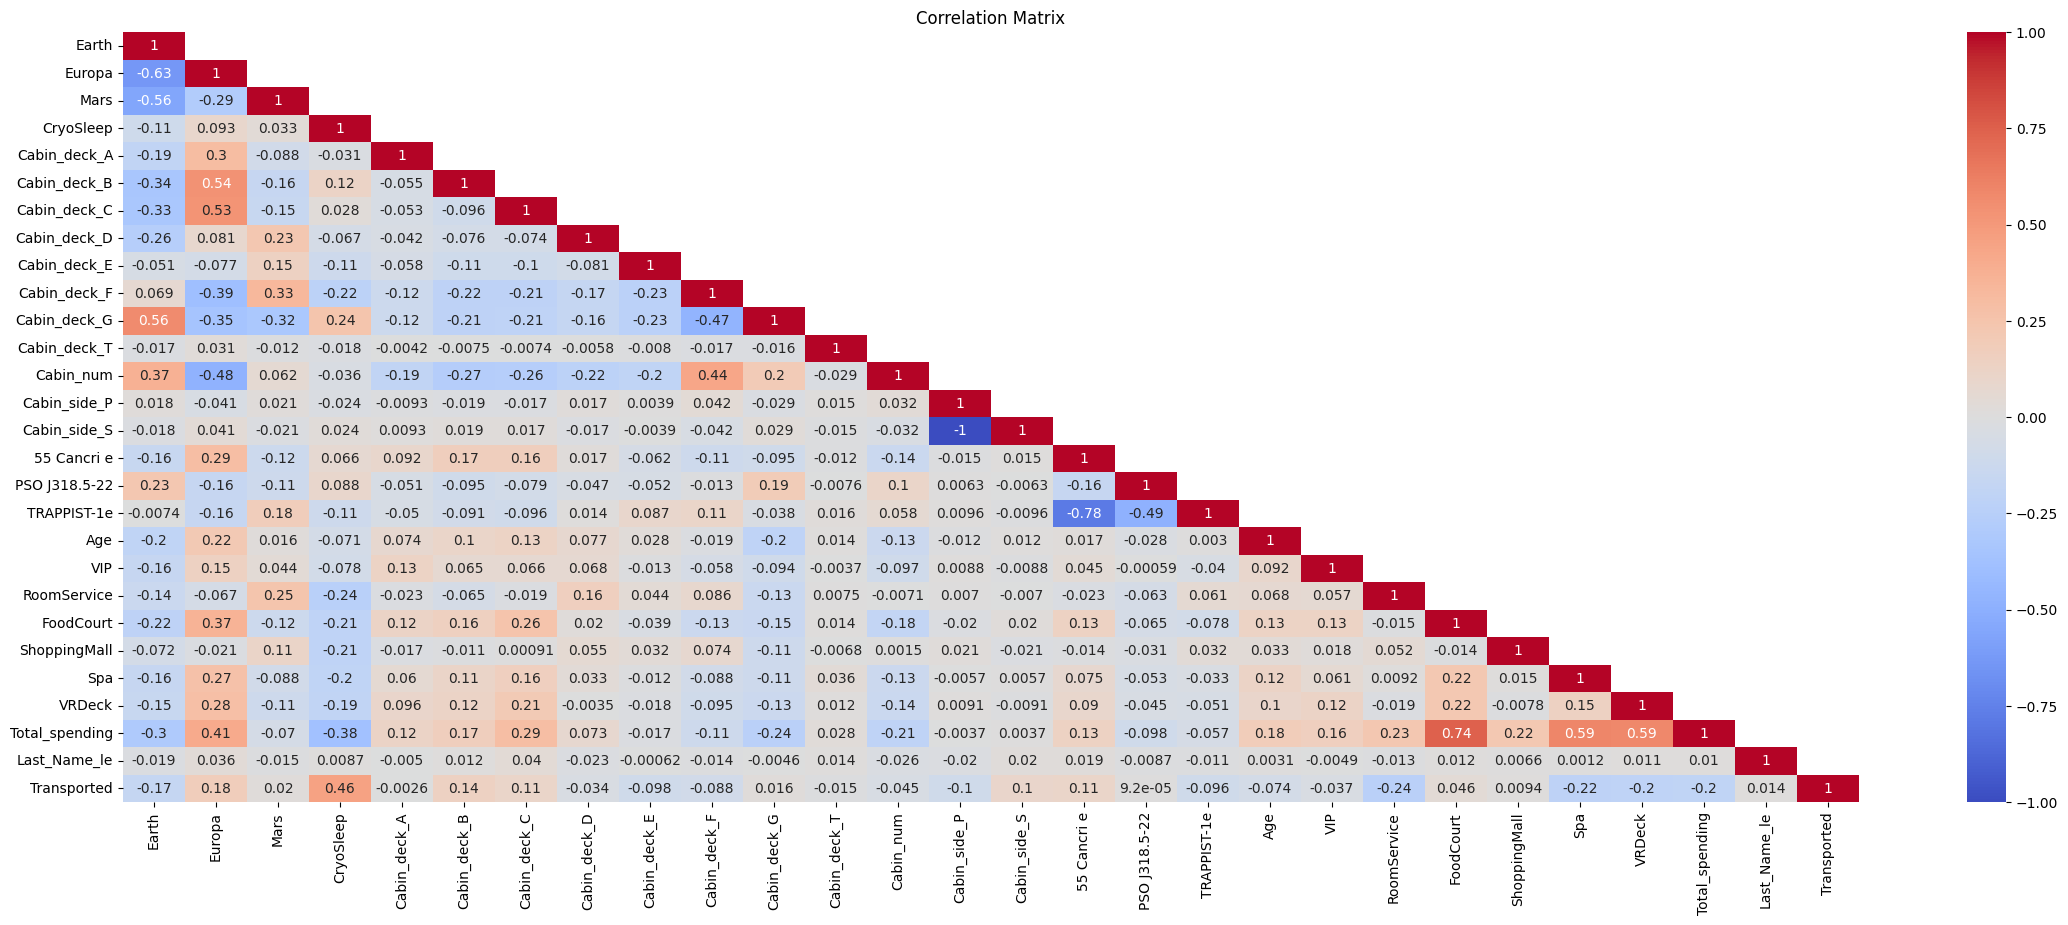

{'CryoSleep', 'Cabin_deck_C', 'RoomService', 'Spa', 'Earth', 'Total_spending', 'Transported', 'VRDeck', '55 Cancri e', 'Cabin_side_P', 'Cabin_deck_B', 'Europa'}


In [11]:
dataframe = pd.DataFrame(pd.concat([train_x, train_y], axis=1))

# Compute correlation matrix
correlation_matrix = dataframe.corr()

# Visualize correlation matrix
plt.figure(figsize=(28, 10))

# Getting the Upper Triangle of the correlation matrix as mask
triu = np.triu(correlation_matrix, k=1)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", mask=triu)
plt.title("Correlation Matrix")
plt.show()

#  Remove features with low correlation to the output
output_correlation_threshold = 0.1  # Adjust this threshold as needed
low_correlation_features = correlation_matrix[abs(correlation_matrix["Transported"]) < output_correlation_threshold].index
dataframe.drop(columns=low_correlation_features, inplace=True)

#  Remove highly correlated features
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:  # Adjust this threshold as needed
            feature_i = correlation_matrix.columns[i]
            feature_j = correlation_matrix.columns[j]
            highly_correlated_features.add(feature_i)  # Remove feature_i

highly_correlated_features = highly_correlated_features & set(dataframe.columns)
dataframe.drop(columns=highly_correlated_features, inplace=True)

# Display the modified dataset after dropping the unwanted features
print(set(dataframe.columns))

In [12]:
output_path = '../preprocess_train_dataset/'
dataframe.to_csv(output_path+'correlation.csv', index=False)